In [ ]:
using DelimitedFiles

start_idx = 751
end_idx = 2000

PLOT_FILENAME = "../plots/1_plot.png"
ORIGINAL_EXTRAPOLATION_DATA = "../data/new_params_original_extrapolation.txt"
PINN_EXTRAPOLATION_DATA = "../data/1_extrapolation.txt"

"../data/1_extrapolation.txt"

In [16]:
loaded_data = readdlm(ORIGINAL_EXTRAPOLATION_DATA)
original_data = Array{Float64}(loaded_data)
original_data = original_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   1.45947   79.5421   9.24194  141.068    -0.0     -0.0   74.3924
   2.00382   79.2579   8.93825  141.068    -0.0     -0.0   74.1262
   3.22149   78.9751   9.02819  141.068    -0.0     -0.0   73.8617
   5.36259   78.6929   9.13437  141.068    -0.0     -0.0   73.5978
   8.2977    78.4114   9.23901  141.068    -0.0     -0.0   73.3345
  11.9962    78.1305   9.34213  141.068    -0.0     -0.0   73.0712
  16.4382    77.8503   9.44376  141.068    -0.0     -0.0   72.806
  21.6016    77.5706   9.54392  141.068    -0.0     -0.0   72.5285
  27.4612    77.2917   9.64264  141.068    -0.0     -0.0   72.2628
  33.9885    77.0134   9.73994  141.068    -0.0     -0.0   72.0089
   ⋮                                                 ⋮    
 112.995    109.607   12.5162    56.1008  137.343   -0.0  102.443
 112.784    109.541   12.5802    55.6879   55.0494  -0.0  102.287
 112.472    109.185   12.6434    55.3558   99.9893  -0.0  102.095
 112.05     108.886   12.706     55.0991   -0.0   

In [17]:
loaded_data = readdlm(PINN_EXTRAPOLATION_DATA)
# loaded_data = readdlm("../data/original_extrapolation_V2.txt")
pinn_data = Array{Float64}(loaded_data)
pinn_data = pinn_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   2.19507  110.17     1.59007  27.3682  13.2815  17.9415  5.44961
   2.39     110.195    1.57943  27.3735  13.2883  17.956   5.43429
   2.84507  110.22     1.56895  27.3789  13.2953  17.9705  5.41891
   3.55808  110.245    1.55878  27.3844  13.3022  17.9847  5.40328
   4.52566  110.27     1.54905  27.3901  13.3093  17.9985  5.38724
   5.7433   110.294    1.53992  27.396   13.3164  18.0118  5.37062
   7.20528  110.319    1.53151  27.4021  13.3237  18.0246  5.35326
   8.90473  110.344    1.52388  27.4083  13.3311  18.0368  5.33504
  10.8336   110.368    1.51702  27.4147  13.3386  18.0483  5.31588
  12.9827   110.392    1.51088  27.4212  13.3462  18.0593  5.2957
   ⋮                                               ⋮       
 172.248    178.792  -19.3521   55.2577  24.4366  39.2919  8.05145
 173.56     178.806  -19.3502   55.2771  24.4598  39.3044  7.91542
 174.462    178.82   -19.3482   55.296   24.4832  39.3169  7.77913
 174.949    178.836  -19.3463   55.3146  24.50

In [18]:
loaded_data = readdlm("../data/simple_extrapolation.txt")
simple_data = Array{Float64}(loaded_data)
simple_data = simple_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   4.42151   65.6914  4.66443  147.24     -5.00582e-6  40.4868      54.9792
   4.82005   65.3678  4.68651  147.363    -5.00582e-6   6.96907e-5  54.6679
   5.73947   65.0461  4.71956  147.363    -5.00582e-6   6.96907e-5  54.3483
   7.17899   64.7263  4.75241  147.363    -5.00582e-6   6.96907e-5  54.0306
   9.13159   64.4084  4.78507  147.363    -5.00582e-6   6.96907e-5  53.7147
  11.5878    64.0923  4.81754  147.363    -5.00582e-6   6.96907e-5  53.4007
  14.5355    63.7781  4.84982  147.363    -5.00582e-6   6.96907e-5  53.0885
  17.9605    63.4657  4.88191  147.363    -5.00582e-6   6.96907e-5  52.7782
  21.846     63.1551  4.91382  147.363    -5.00582e-6   6.96907e-5  52.4696
  26.173     62.8464  4.94553  147.363    -5.00582e-6   6.96907e-5  52.1629
   ⋮                                                    ⋮           
 114.68     110.218   6.33058   78.5971  135.194        7.45595e-5  93.5924
 114.216    110.405   6.38736   77.7616  115.505        7.45595e-5  93.

In [24]:
using Statistics

parameter = 7
simple_data1 = simple_data[:, parameter]
original_data1 = original_data[:, parameter]
pinn_data1 = pinn_data[:, parameter]

println("MSE simple model: ", mean(abs2, simple_data1 .- original_data1))
# println("MSE PINN model: ", mean(abs2, pinn_data1 .- original_data1))
println("MSE PINN model: ", mean(abs2, simple_data1 .- pinn_data1))


MSE simple model: 192.72946921738017
MSE PINN model: 4788.942929314734


In [25]:
using Plots

function plot_differences(idx)
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(x, y1, label="Original", lw=2)
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end

plot_differences (generic function with 1 method)

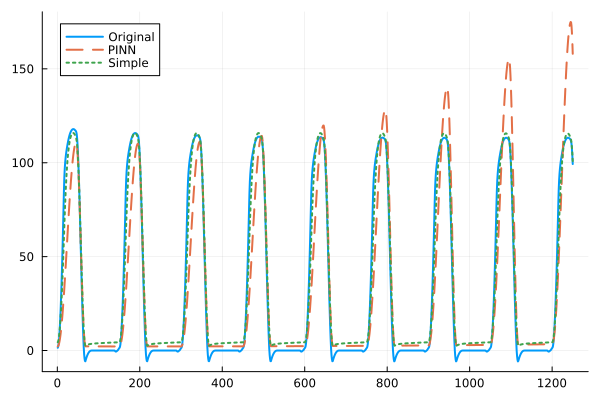

In [26]:
plot_differences(1)

In [34]:
function plot_diff_layout(filename::String)
    layout = @layout [a b c; d e f; g e f]

    p = plot(
        plot_differences(1),
        plot_differences(2),
        plot_differences(3),
        plot_differences(4),
        plot_differences(5),
        plot_differences(6),
        plot_differences(7),
        layout = layout,
        size = (1000, 800)
    )

    savefig(p, filename)
    return p
end

plot_diff_layout (generic function with 2 methods)

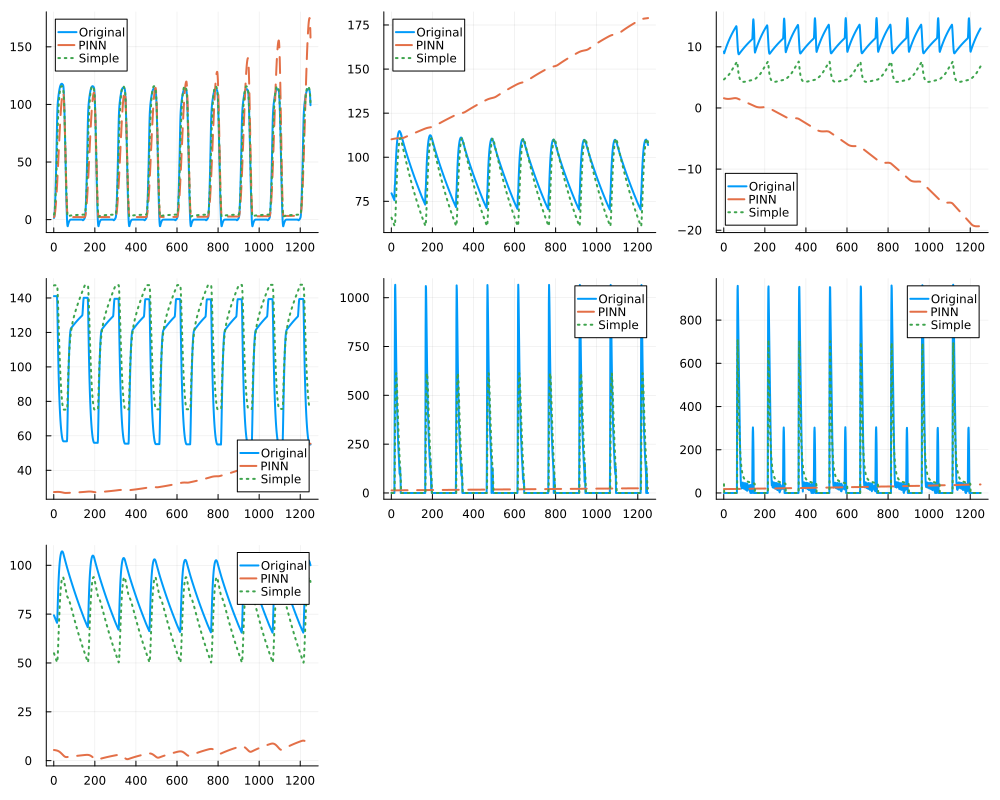

In [35]:
plot_diff_layout(PLOT_FILENAME)